# Transformação de variáveis (exemplo)



In [2]:
#@title Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf #adicionada na semana 6
import seaborn as sns
import scipy.stats as stats #adicionada na semana 6
from scipy.stats import f #adicionada na semana 6
from statsmodels.graphics.gofplots import ProbPlot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#@title Conjunto de dados original
dx1 = (0.93, 1.11, 0.93, 1.11, 0.93, 1.11, 0.93, 1.11,
       1.02, 1.02, 1.02, 1.02)
dx2 = (1.00, 1.00, 1.00, 1.00, 1.40, 1.40, 1.40, 1.40, 
       1.18, 1.18, 1.18, 1.18)
dx3= (0.20, 0.20, 0.50, 0.50, 0.20, 0.20, 0.50, 0.50,
      0.31, 0.31, 0.31, 0.31)
dy= (32.95, 38.72, 35.20, 38.72, 32.27, 39.71, 33.67, 
     38.72, 35.20, 33.67, 36.02, 32.27)
# Construir o DataFrame e nomear as colunas
dfo = pd.DataFrame(list(zip(dx1, dx2, dx3, dy)),
               columns =["x1","x2","x3","y"])
dfo.head(3)

,x1,x2,x3,y
0,0.93,1.0,0.2,32.95
1,1.11,1.0,0.2,38.72
2,0.93,1.0,0.5,35.20


In [4]:
#@title Conjunto de dados transformado 
lnx1 = np.log(dx1)
lnx2 = np.log(dx2)
lnx3= np.log(dx3)
lny= np.log(dy)
# Construir o DataFrame e nomear as colunas
dft = pd.DataFrame(list(zip(lnx1, lnx2, lnx3, lny)),
               columns =["lnx1","lnx2","lnx3","lny"])
dft.head(4)

,lnx1,lnx2,lnx3,lny
0,-0.072571,0.0,-1.609438,3.494991
1,0.104360,0.0,-1.609438,3.656356
2,-0.072571,0.0,-0.693147,3.561046
3,0.104360,0.0,-0.693147,3.656356


In [5]:
#@title Regressão modelo de múltiplas variáveis
#regressão com a fórmula import statsmodels.formula.api as smf 
regmul = smf.ols('lny ~ lnx1 + lnx2 + lnx3', data = dft) 
#Realizar o processo de modelagem
res = regmul.fit()

In [6]:
#Resultado detalhado
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    lny   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.398
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0161
Time:                        01:15:28   Log-Likelihood:                 21.634
No. Observations:                  12   AIC:                            -35.27
Df Residuals:                       8   BIC:                            -33.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5880      0.049     73.095      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [7]:
#@title Cálculo do Fcrit (tabela)
import scipy.stats
F=res.fvalue
k=res.df_model # grau do modelo
n=res.nobs # num. amostras
dfn=k
dfd=n-(k+1)
alpha = 0.05 #nível de confiança.
F_critico=scipy.stats.f.ppf(1-alpha, dfn, dfd)
print("F_crit=",F_critico) #tabela F-dist

F_crit= 4.06618055135116


In [8]:
#@title Alguns comandos importantes
#parâmetros estimados
print(res.params) 
#R2
print(res.rsquared) 
#calculando F-statistic 
F = res.mse_model/res.mse_resid 
print(F) 
#F provided by the res object 
print(res.fvalue)

Intercept    3.587969
lnx1         0.843947
lnx2        -0.027956
lnx3         0.024493
dtype: float64
0.7058127104375433
6.397853661974272
6.397853661974272


In [9]:
#@title Regressão linear simples após aceitar hipótese nula para b2 e b3
#Apenas para verificar refazer a regresão com uma úica variável
#Devido a que os preditores b2 e b3 foram cancelados
#regressão com a fórmula import statsmodels.formula.api as smf 
regmulin = smf.ols('lny ~ lnx1', data = dft) 
#Realizar o processo de modelagem
reslin = regmulin.fit()
#Resultado detalhado
print(reslin.summary())

                            OLS Regression Results                            
Dep. Variable:                    lny   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     22.01
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           0.000853
Time:                        01:15:28   Log-Likelihood:                 21.273
No. Observations:                  12   AIC:                            -38.55
Df Residuals:                      10   BIC:                            -37.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5549      0.013    266.062      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [10]:
#@title Gráficos dispersão e resíduos
#Valores previstos e residuos
y_pred=list(reslin.predict())
resi=reslin.resid
#crear instancia influence
influence = reslin.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
prop=np.divide(resi,stdresid) #e/e*

In [11]:
dftab = pd.DataFrame(list(zip(lnx1, lny, y_pred, resi, stdresid, prop)),
               columns =["lnx1","lny","lnyc","e","e*","e/e*"])
dftab

,lnx1,lny,lnyc,e,e*,e/e*
0,-0.072571,3.494991,3.493690,0.001301,0.032553,0.039971
1,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
2,-0.072571,3.561046,3.493690,0.067356,1.685111,0.039971
3,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
4,-0.072571,3.474138,3.493690,-0.019552,-0.489153,0.039971
5,0.104360,3.681603,3.642998,0.038605,0.961341,0.040157
6,-0.072571,3.516607,3.493690,0.022917,0.573341,0.039971
7,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
8,0.019803,3.561046,3.571642,-0.010596,-0.245800,0.043108
9,0.019803,3.516607,3.571642,-0.055035,-1.276683,0.043108


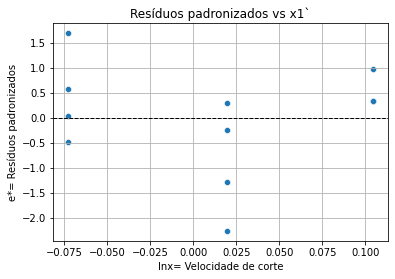

In [12]:
sns.scatterplot(x='lnx1', y='e*', data=dftab);plt.grid(True)
plt.xlabel('lnx= Velocidade de corte')
plt.ylabel('e*= Resíduos padronizados')
plt.title('Resíduos padronizados vs x1`')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

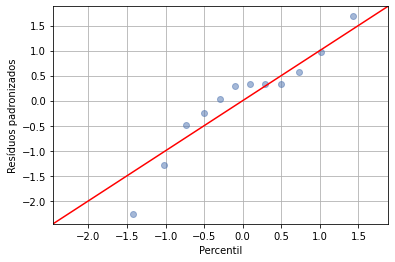

In [13]:
#Verificar a normalidade dos resíduos
#qqpolot vs. normal distribution 
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')
plt.grid(True)


In [14]:
#@title extras 
#ANOVA
table = sm.stats.anova_lm(res, typ=1) # 
print(table)

           df    sum_sq   mean_sq          F    PR(>F)
lnx1      1.0  0.044615  0.044615  18.697041  0.002532
lnx2      1.0  0.000177  0.000177   0.074082  0.792377
lnx3      1.0  0.001008  0.001008   0.422438  0.533937
Residual  8.0  0.019090  0.002386        NaN       NaN


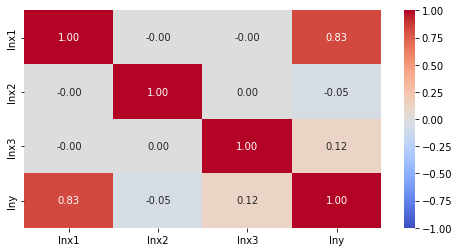

In [23]:
# Calcula a correlação entre as variáveis do modelo
corr = dft.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [34]:
import scipy 
mc = scipy.corrcoef(dft, rowvar=0) 
print(mc)

[[ 1.00000000e+00 -2.38129915e-04 -6.38880596e-04  8.29188751e-01]
 [-2.38129915e-04  1.00000000e+00  2.34035744e-04 -5.23916748e-02]
 [-6.38880596e-04  2.34035744e-04  1.00000000e+00  1.24095443e-01]
 [ 8.29188751e-01 -5.23916748e-02  1.24095443e-01  1.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  


In [35]:
#Klein’s rule of thumb 
mc2 = mc**2 
print(mc2)

[[1.00000000e+00 5.67058563e-08 4.08168416e-07 6.87553984e-01]
 [5.67058563e-08 1.00000000e+00 5.47727297e-08 2.74488759e-03]
 [4.08168416e-07 5.47727297e-08 1.00000000e+00 1.53996790e-02]
 [6.87553984e-01 2.74488759e-03 1.53996790e-02 1.00000000e+00]]


In [36]:
#VIF criterion 
vif = np.linalg.inv(mc) 
print(vif)

[[ 3.3375094  -0.14696941  0.35196724 -2.81880276]
 [-0.14696941  1.00927067 -0.02235921  0.17751744]
 [ 0.35196724 -0.02235921  1.05280525 -0.42366705]
 [-2.81880276  0.17751744 -0.42366705  3.39919512]]


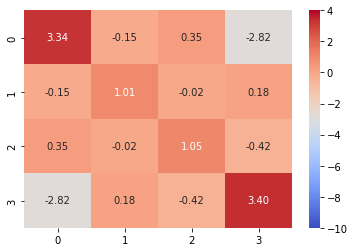

In [38]:
#Gráfico do VIF, um critério indicador de multicolinearidade é considerar VIF>4
sns.heatmap(vif, cmap='coolwarm', annot=True, fmt=".2f", vmin=-10, vmax=4)

# Modelo logístico (exemplo)

In [27]:
#@title Definir os dados
lstx1 = (1.80, 1.65, 2.70, 3.67, 1.41, 1.76, 2.10, 2.10, 4.57, 3.59,
         8.33, 2.86, 2.58, 2.90, 3.89, 0.80, 0.60, 1.30, 0.83, 0.57, 
         1.44, 2.08, 1.50, 1.38, 0.94, 1.58, 1.67, 3.00, 2.21)
lstx2 = (2.40, 2.54, 0.84, 1.68, 2.41, 1.93, 1.77, 1.50, 2.43, 5.55,
         5.58, 2.00, 3.68, 1.13, 2.49, 1.37, 1.27, 0.87, 0.97, 0.94, 
         1.00, 0.78, 1.03, 0.82, 1.30, 0.83, 1.05, 1.19, 0.86)
lsty= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx1, lstx2,lsty)),
               columns =["x1","x2","y"])
x=df[['x1','x2']]
y=df['y']
df.head(3)

,x1,x2,y
0,1.80,2.40,1
1,1.65,2.54,1
2,2.70,0.84,1


In [17]:
#@title Regressão logística
#adicionar uma constante preditora
x = sm.add_constant(x)
# Construir o modelo e ajustar os dados 
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.151888
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   29
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.7807
Time:                        01:15:29   Log-Likelihood:                -4.4048
converged:                       True   LL-Null:                       -20.084
Covariance Type:            nonrobust   LLR p-value:                 1.551e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1457      5.184     -2.536      0.011     -23.306      -2.985
x1             2.7740      1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
model.params

const   -13.145657
x1        2.774021
x2        5.668211
dtype: float64

In [19]:
#@title Razão das chances
# ... Define and fit model
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
print(odds_ratios)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

              OR   Lower CI   Upper CI
const -13.145657 -23.306390  -2.984923
x1      2.774021  -0.121639   5.669680
x2      5.668211   0.489678  10.846743
               OR      Lower CI      Upper CI
const    0.000002  7.553761e-11      0.050543
x1      16.022926  8.854677e-01    289.941871
x2     289.516064  1.631791e+00  51366.594509


In [20]:
#@title Valores previstos vs. observados
# performing predictions on the test datdaset
yhat = model.predict()
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Valores observados:', list(y))
print('Valores previstos:', prediction)
df2 = pd.DataFrame(list(zip(y, prediction)),
               columns =["x","y"])
#df2.to_csv(index=False)

Valores observados: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Valores previstos: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [21]:
#@title Acurácia do modelo
from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

Confusion Matrix : 
 [[13  1]
 [ 1 14]]
Test accuracy =  0.9310344827586207


In [22]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # significia = 5% 
df = 11 # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 2.200985160082949


## Extras

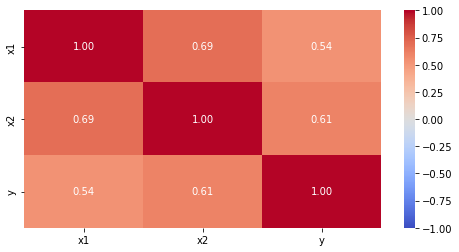

In [48]:
# Calcula a correlação entre as variáveis do modelo
corr = df.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [49]:
import scipy 
mclo = scipy.corrcoef(df, rowvar=0) 
print(mclo)

[[1.         0.68809573 0.53836676]
 [0.68809573 1.         0.60809228]
 [0.53836676 0.60809228 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  


In [50]:
#Klein’s rule of thumb 
mc2lo = mc**2 
print(mc2lo)

[[1.         0.47347574 0.28983876]
 [0.47347574 1.         0.36977622]
 [0.28983876 0.36977622 1.        ]]


In [51]:
#VIF criterion 
viflo = np.linalg.inv(mc) 
print(viflo)

[[ 1.98531787 -1.13632971 -0.37783582]
 [-1.13632971  2.23713518 -0.74862249]
 [-0.37783582 -0.74862249  1.6586458 ]]


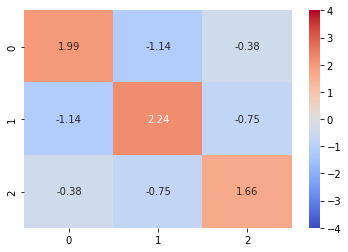

In [53]:
sns.heatmap(viflo, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)